## Imports and dataset loading

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

originalDataSet = []
channelTypes    = [1, 2, 4]
ampNumbers      = [2, 3, 4]

gainArray = []
lossArray = []

for ch in channelTypes:
    for amp in ampNumbers:
        originalDataSet.append(pd.read_csv('datasets/{}_channel_type/dataset-{}.txt'.format(ch, amp), sep = ',',header = None))

def loadDataset(channelIndex):    
    dataSet = originalDataSet[channelIndex].values
    features, result = np.array(dataSet[:, :40]), np.array(dataSet[:, 40:])
    return features, result

row = -1
col = 0
for i in range(9):
    col = i % 3
    
    if col == 0:
        row += 1
    print(row, col)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


## Setting data for plotting

In [2]:
for i in range(9):
    gainSlices       = []
    lossSlices       = []
    features, result = loadDataset(i)
    ampNumber        = int(len(result[0]) / 2)
        
    for j in range(ampNumber):
        gainSlices.append(result[:, j * 2])
        lossSlices.append(result[:, j * 2 + 1])

    gainArray.append(np.stack(gainSlices, axis = -1))
    lossArray.append(np.stack(lossSlices, axis = -1))

## Plotting functions

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def plotGroupedBoxplot():
    row = -1
    
    fig, axis = plt.subplots(3, 3, figsize = (10, 8))
    
    for i in range(9):
        gainData = []
        lossData = []
        poutData = []
        ticks    = []  
        col      = i % 3 
        
        if col == 0:
            row += 1

        for j in range(ampNumbers[col]):
            gainData.append(gainArray[i][:, j])
            lossData.append(lossArray[i][:, j])
            poutData.append(gainArray[i][:, j] - lossArray[i][:, j])
            ticks.append("Amp {}".format(j + 1))
        
        gainBP = axis[row, col].boxplot(gainData, positions = np.array(range(len(gainData)))*3.0-0.3, sym = "")
        lossBP = axis[row, col].boxplot(lossData, positions = np.array(range(len(lossData)))*3.0+0.3, sym = "")
        poutBP = axis[row, col].boxplot(poutData, positions = np.array(range(len(poutData)))*3.0+0.9, sym = "")
        
        axis[row, col].set_xticks(range(0, len(ticks) * 3, 3))
        axis[row, col].set_xticklabels(ticks)
        axis[row, col].axis(xmin = -3, xmax = len(ticks)*3)
        
        set_box_color(gainBP, '#2C7BB6')
        set_box_color(lossBP, '#D7191C')
        set_box_color(poutBP, '#00FF00')

    axis[0, 0].set_ylabel("1 channel type", fontsize = 8)
    axis[1, 0].set_ylabel("2 channel type", fontsize = 8)
    axis[2, 0].set_ylabel("4 channel type", fontsize = 8)
    
    plt.plot([], c='#2C7BB6', label='Gain')
    plt.plot([], c='#D7191C', label='Loss')
    plt.plot([], c='#00FF00', label='Output Power')
    fig.text(-0.01, 0.5, 'Metrics (dB)', va='center', rotation='vertical', fontsize = 14)
    
    fig.legend(loc='center right')
    fig.tight_layout()

    plt.savefig('groupedBoxplot.png')

## Plotting

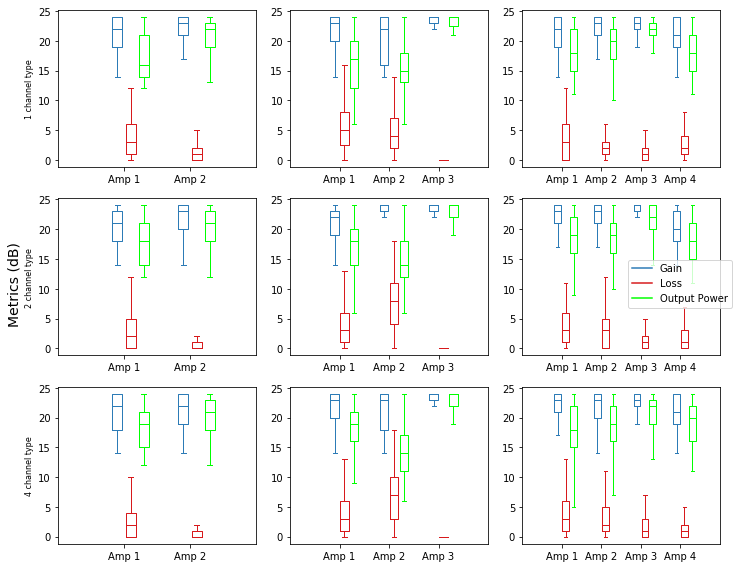

In [4]:
plotGroupedBoxplot()